In [46]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import pandas as pd
import netCDF4
%matplotlib inline

In [48]:
areacella1 = xr.open_dataset('areacella_fx_CanESM5_historical_r10i1p1f1_gn.nc').areacella
areacella2 = xr.open_dataset('areacella_fx_CanESM5-CanOE_historical_r1i1p2f1_gn.nc').areacella
areacella3 = xr.open_dataset('areacella_fx_UKESM1-0-LL_piControl_r1i1p1f2_native.nc').areacella
areacella4 = xr.open_dataset('areacella_fx_CNRM-ESM2-1_historical_r10i1p1f2_gr.nc').areacella
areacella5 = xr.open_dataset('areacella_fx_IPSL-CM6A-LR_historical_r1i1p1f1_gr.nc').areacella
areacella6 = xr.open_dataset('areacella_fx_ACCESS-ESM1-5_historical_r1i1p1f1_gn.nc').areacella
areacella7 = xr.open_dataset('areacella_fx_MPI-ESM1-2-LR_historical_r1i1p1f1_gn.nc').areacella
areacella8 = xr.open_dataset('areacella_fx_MIROC-ES2L_historical_r10i1p1f2_gn.nc').areacella
areacella9 = xr.open_dataset('areacella_fx_INM-CM5-0_historical_r1i1p1f1_gr1.nc').areacella
areacella10 = xr.open_dataset('areacella_fx_INM-CM4-8_historical_r1i1p1f1_gr1.nc').areacella

In [49]:
landfrac1 = xr.open_dataset('sftlf_fx_CanESM5_ssp585_r1i1p1f1_gn.nc').sftlf
landfrac2 = xr.open_dataset('sftlf_fx_CanESM5-CanOE_historical_r1i1p2f1_gn.nc').sftlf
landfrac3 = xr.open_dataset('sftlf_fx_UKESM1-0-LL_piControl_r1i1p1f2_native.nc').sftlf
landfrac4 = xr.open_dataset('sftlf_fx_CNRM-ESM2-1_historical_r10i1p1f2_gr.nc').sftlf
landfrac5 = xr.open_dataset('sftlf_fx_IPSL-CM6A-LR_historical_r1i1p1f1_gr.nc').sftlf
landfrac6 = xr.open_dataset('sftlf_fx_ACCESS-ESM1-5_historical_r10i1p1f1_gn.nc').sftlf
landfrac7 = xr.open_dataset('sftlf_fx_MPI-ESM1-2-LR_historical_r1i1p1f1_gn.nc').sftlf
landfrac8 = xr.open_dataset('sftlf_fx_MIROC-ES2L_historical_r1i1p1f2_gn.nc').sftlf
landfrac9 = xr.open_dataset('sftlf_fx_INM-CM5-0_historical_r1i1p1f1_gr1.nc').sftlf
landfrac10 = xr.open_dataset('sftlf_fx_INM-CM4-8_historical_r1i1p1f1_gr1.nc').sftlf

In [50]:
area1 = areacella1 * landfrac1/100
area2 = areacella2 * landfrac2/100
area3 = areacella3 * landfrac3/100
area4 = areacella4 * landfrac4/100
area5 = areacella5 * landfrac5/100
area6 = areacella6 * landfrac6/100
area7 = areacella7 * landfrac7/100
area8 = areacella8 * landfrac8/100
area9 = areacella9 * landfrac9/100
area10 = areacella10 * landfrac10/100

In [51]:
ds1 = xr.open_dataset('nbp_Lmon_CanESM5_hist_ssp245_r1i1p1f1_gn_185001-210012.nc')
ds2 = xr.open_dataset('nbp_Lmon_CanESM5-CanOE_hist_ssp245_r1i1p2f1_gn_185001-210012.nc')
ds3 = xr.open_dataset('nbp_Lmon_UKESM1-0-LL_hist_ssp245_r1i1p1f2_gn_185001-210012.nc')
ds4 = xr.open_dataset('nbp_Lmon_CNRM-ESM2-1_hist_ssp245_r1i1p1f2_gr_185001-210012.nc')
ds5 = xr.open_dataset('nbp_Lmon_IPSL-CM6A-LR_hist_ssp245_r1i1p1f1_gr_185001-210012.nc')
ds6 = xr.open_dataset('nbp_Lmon_ACCESS-ESM1-5_hist_ssp245_r1i1p1f1_gn_185001-210012.nc')
ds7 = xr.open_dataset('nbp_Lmon_MPI-ESM1-2-LR_hist_ssp245_r1i1p1f1_gn_185001-210012.nc')
ds8 = xr.open_dataset('nbp_Lmon_MIROC-ES2L_hist_ssp245_r1i1p1f2_gn_185001-210012.nc')
ds9 = xr.open_dataset('nbp_Lmon_INM-CM5-0_hist_ssp245_r1i1p1f1_gr1_185001-210012.nc')
ds10 = xr.open_dataset('nbp_Lmon_INM-CM4-8_hist_ssp245_r1i1p1f1_gr1_185001-210012.nc')

In [52]:
dset_dict = {'CanESM5':ds1, 'CanESM5-CanOE':ds2, 'UKESM1-0-LL':ds3,  
             'CNRM-ESM2-1':ds4, 'IPSL-CM6A-LR':ds5, 'ACCESS-ESM1-5':ds6,
             'MPI-ESM1-2-LR':ds7, 'MIROC-ES2L':ds8,
             'INM-CM5-0':ds9, 'INM-CM4-8':ds10}

In [53]:
time_slice=slice('1850', '2100')

In [54]:
#initialize dictionary of xarray datasets
nbp_dict = {}

for name, ds in dset_dict.items():
        
    ds = xr.decode_cf(ds)
    ds = ds.sel(time=time_slice)
    
    # convert from per second to per year
    yearsec = 365*24*60*60
    ds.nbp.data = ds.nbp.data * yearsec
    
    #convert from kg to GtC
    ds.nbp.data = ds.nbp.data/(1e12)
    ds.nbp.attrs['units'] = 'GtC m-2 y-1'
    
    #nbp_mon=nbp_mon.sel(lon=slice(lon1,lon2), lat=slice(lat1,lat2))
    
    # drop redundant variables (like "height: 2m")
    for coord in ds.coords:
        if coord not in ['lat', 'lon', 'time']:
            ds = ds.drop(coord)

    nbp_dict[name] = ds

In [55]:
glob1 = nbp_dict['CanESM5'].nbp.weighted(area1).sum(('lon','lat'))
glob2 = nbp_dict['CanESM5-CanOE'].nbp.weighted(area2).sum(('lon','lat'))
glob3 = nbp_dict['UKESM1-0-LL'].nbp.weighted(area3).sum(('lon','lat'))
glob4 = nbp_dict['CNRM-ESM2-1'].nbp.weighted(area4).sum(('lon','lat'))
glob5 = nbp_dict['IPSL-CM6A-LR'].nbp.weighted(area5).sum(('lon','lat'))
glob6 = nbp_dict['ACCESS-ESM1-5'].nbp.weighted(area6).sum(('lon','lat'))
glob7 = nbp_dict['MPI-ESM1-2-LR'].nbp.weighted(area7).sum(('lon','lat'))
glob8 = nbp_dict['MIROC-ES2L'].nbp.weighted(area8).sum(('lon','lat'))
glob9 = nbp_dict['INM-CM5-0'].nbp.weighted(area9).sum(('lon','lat'))
glob10 = nbp_dict['INM-CM4-8'].nbp.weighted(area10).sum(('lon','lat'))

In [56]:
gnbp_dict = {'CanESM5':glob1, 'CanESM5-CanOE':glob2, 'UKESM1-0-LL':glob3, 
             'CNRM-ESM2-1':glob4, 'IPSL-CM6A-LR':glob5,'ACCESS-ESM1-5':glob6,
             'MPI-ESM1-2-LR':glob7, 'MIROC-ES2L':glob8,
             'INM-CM5-0':glob9, 'INM-CM4-8':glob10}

## Plotting Time Series: Changes in global mean nbp (1850-2100 wrt 1850-1900)

In [58]:
for name, gnbp in gnbp_dict.items():
    
    # drop redundant variables (like "type")
    for coord in gnbp.coords:
        if coord not in ['time']:
            gnbp = gnbp.drop(coord)
    
    # reference the GSAT relative to the 1850 to 1900 pre-industrial period
    gnbp_anomalies = gnbp - gnbp.sel(time=slice('1850','1900')).mean(dim='time')
    
    gnbp_ann_anomalies = gnbp_anomalies.groupby('time.year').mean('time')
        
    # renaming labels
    gnbp_ann_anomalies = gnbp_ann_anomalies.rename(
        r'Global-mean land carbon flux relative to 1850-1900 in GtC/yr'
    )
    
    gnbp_dict[name] = gnbp_ann_anomalies.compute()

In [59]:
gnbp_ann_anomalies.dims, gnbp_ann_anomalies.shape, gnbp_ann_anomalies.coords

(('year',),
 (251,),
 Coordinates:
   * year     (year) int64 1850 1851 1852 1853 1854 ... 2096 2097 2098 2099 2100)

In [60]:
gnbp1_roll = gnbp_dict['CanESM5'].rolling(year=10).mean()
gnbp2_roll = gnbp_dict['CanESM5-CanOE'].rolling(year=10).mean()
gnbp3_roll = gnbp_dict['UKESM1-0-LL'].rolling(year=10).mean()
gnbp4_roll = gnbp_dict['CNRM-ESM2-1'].rolling(year=10).mean()
gnbp5_roll = gnbp_dict['IPSL-CM6A-LR'].rolling(year=10).mean()
gnbp6_roll = gnbp_dict['ACCESS-ESM1-5'].rolling(year=10).mean()
gnbp7_roll = gnbp_dict['MPI-ESM1-2-LR'].rolling(year=10).mean()
gnbp8_roll = gnbp_dict['MIROC-ES2L'].rolling(year=10).mean()
gnbp9_roll = gnbp_dict['INM-CM5-0'].rolling(year=10).mean()
gnbp10_roll = gnbp_dict['INM-CM4-8'].rolling(year=10).mean()

modelmean = (gnbp1_roll + gnbp2_roll + gnbp3_roll + gnbp4_roll +gnbp5_roll+gnbp6_roll 
             + gnbp7_roll + gnbp8_roll + gnbp9_roll +gnbp10_roll)/10

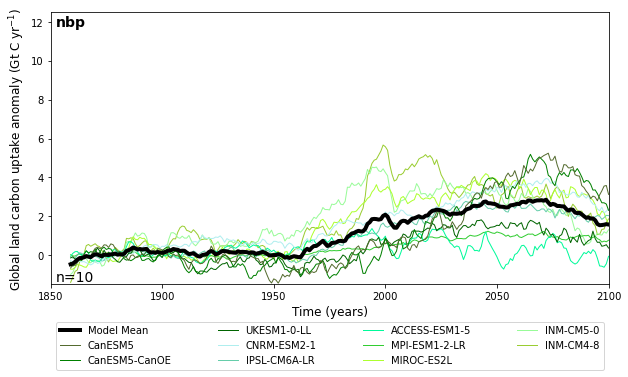

In [61]:
fig,ax = plt.subplots(figsize=(10,5))

gnbp10_roll.plot(linewidth=1, color= 'yellowgreen',  label='INM-CM4-8')
gnbp9_roll.plot(linewidth=1, color= 'palegreen', label='INM-CM5-0')
gnbp8_roll.plot(linewidth=1, color= 'greenyellow', label='MIROC-ES2L')
gnbp7_roll.plot(linewidth=1, color= 'Limegreen',  label='MPI-ESM1-2-LR')
gnbp6_roll.plot(linewidth=1, color= 'mediumspringgreen', label='ACCESS-ESM1-5')
gnbp5_roll.plot(linewidth=1, color= 'mediumaquamarine',  label='IPSL-CM6A-LR')
gnbp4_roll.plot(linewidth=1, color= 'paleturquoise', label='CNRM-ESM2-1')
gnbp3_roll.plot(linewidth=1, color= 'darkgreen', label='UKESM1-0-LL')
gnbp2_roll.plot(linewidth=1, color= 'green', label='CanESM5-CanOE')
gnbp1_roll.plot(linewidth=1, color= 'darkolivegreen', label='CanESM5')

modelmean.plot(linewidth=4, color= 'black', label= 'Model Mean')

#add right colors
#N = 6
#plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.RdYlGn(np.linspace(0,1,N)))

# set titel and name for axes
# plt.title('SSP2-4.5', fontsize = 14, fontweight = 'bold')
ax.text(0.01, 0.95, 'nbp', 
        transform=ax.transAxes, ha="left", fontsize= 14, fontweight = 'bold')
ax.text(0.009, 0.01, 'n=10', 
        transform=ax.transAxes, ha="left", fontsize= 14)
plt.xlabel('Time (years)', fontsize = 12)
plt.ylabel(r'Global land carbon uptake anomaly (Gt C yr$^{\minus1}$)', fontsize = 12)
plt.xlim([1850,2100])
plt.ylim([-1.5,12.5])

# plotting legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],bbox_to_anchor=(0, -0.12, 1, 0), loc="upper left", mode="expand", ncol=4)

plt.savefig("TimeSeriesMultiModelCarbonChanges245.png", bbox_inches="tight")
plt.show();

In [37]:
max_nbp = max(modelmean)  # Find the maximum y value
max_year = modelmean[modelmean.argmax()]  # Find the x value corresponding to the maximum y value
print (max_year, max_nbp)

<xarray.DataArray 'Global-mean land carbon flux relative to 1850-1900 in GtC/yr' ()>
array(2.97542095)
Coordinates:
    year     int64 2072 <xarray.DataArray 'Global-mean land carbon flux relative to 1850-1900 in GtC/yr' ()>
array(nan)
Coordinates:
    year     int64 1850


In [38]:
modelmean.sel(year=slice('2025','2035'))

<xarray.DataArray 'Global-mean land carbon flux relative to 1850-1900 in GtC/yr' (year: 11)>
array([2.42107683, 2.39744318, 2.3484284 , 2.26119505, 2.19463266,
       2.26276516, 2.25341588, 2.24775887, 2.26780865, 2.27748042,
       2.32406242])
Coordinates:
  * year     (year) int64 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035

In [39]:
modelmean.sel(year=slice('2025','2035')).mean()

<xarray.DataArray 'Global-mean land carbon flux relative to 1850-1900 in GtC/yr' ()>
array(2.29600614)

In [40]:
modelmean.sel(year=slice('2042','2052'))

<xarray.DataArray 'Global-mean land carbon flux relative to 1850-1900 in GtC/yr' (year: 11)>
array([2.65754645, 2.72291187, 2.86051068, 2.88270795, 2.79371521,
       2.79207709, 2.76921166, 2.75508926, 2.70268875, 2.61952983,
       2.61229364])
Coordinates:
  * year     (year) int64 2042 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052

In [41]:
modelmean.sel(year=slice('2042','2052')).mean()

<xarray.DataArray 'Global-mean land carbon flux relative to 1850-1900 in GtC/yr' ()>
array(2.74257113)

In [42]:
modelmean.sel(year=slice('2090','2100'))

<xarray.DataArray 'Global-mean land carbon flux relative to 1850-1900 in GtC/yr' (year: 11)>
array([2.04057789, 2.06818232, 1.99884371, 2.01238349, 1.91873345,
       1.72360914, 1.66009612, 1.67028353, 1.68799843, 1.71645216,
       1.69437283])
Coordinates:
  * year     (year) int64 2090 2091 2092 2093 2094 2095 2096 2097 2098 2099 2100

In [43]:
modelmean.sel(year=slice('2090','2100')).mean()

<xarray.DataArray 'Global-mean land carbon flux relative to 1850-1900 in GtC/yr' ()>
array(1.83559391)

In [44]:
modelmean.sel(year=slice('2067','2077'))

<xarray.DataArray 'Global-mean land carbon flux relative to 1850-1900 in GtC/yr' (year: 11)>
array([2.91366568, 2.94000975, 2.94008202, 2.94861048, 2.92363001,
       2.97542095, 2.82766171, 2.70046015, 2.75846774, 2.72614792,
       2.64993091])
Coordinates:
  * year     (year) int64 2067 2068 2069 2070 2071 2072 2073 2074 2075 2076 2077

In [45]:
modelmean.sel(year=slice('2067','2077')).mean()

<xarray.DataArray 'Global-mean land carbon flux relative to 1850-1900 in GtC/yr' ()>
array(2.84582612)

# Plotting Maps of hot model: CanESM5 (ECS 5.64)

In [132]:
#initialize dictionary of xarray datasets
nbp_dict = {}

for name, ds in dset_dict.items():
        
    ds = xr.decode_cf(ds)
    ds = ds.sel(time=time_slice)
    
    # convert from per second to per year
    yearsec = 365*24*60*60
    ds.nbp.data = ds.nbp.data * yearsec
    
    #convert from kg to g
    ds.nbp.data = ds.nbp.data*(1e3)
    ds.nbp.attrs['units'] = 'g C m-2 y-1'
    
    #nbp_mon=nbp_mon.sel(lon=slice(lon1,lon2), lat=slice(lat1,lat2))
    
    # drop redundant variables (like "height: 2m")
    for coord in ds.coords:
        if coord not in ['lat', 'lon', 'time']:
            ds = ds.drop(coord)

    nbp_dict[name] = ds

In [133]:
# selecting model out of dictionary
ssp_hot1 = nbp_dict[list(nbp_dict.keys())[0]]
ssp_hot1.attrs['parent_source_id']

'CanESM5'

In [135]:
# check units
ssp_hot1.nbp.attrs['units']

'g C m-2 y-1'

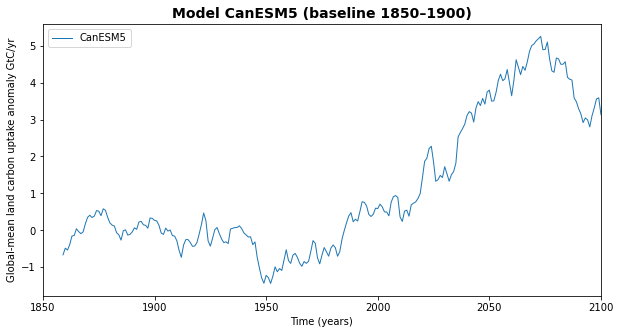

In [136]:
plt.figure(figsize=(10,5))

gnbp1_roll.plot(linewidth=1, label='%s' %(ssp_hot1.attrs['parent_source_id']))

# set titel and name for axes
plt.title('Model %s (baseline 1850–1900)' %(ssp_hot1.attrs['parent_source_id']),
         fontsize = 14, fontweight = 'bold')
plt.xlabel('Time (years)')
plt.ylabel(r'Global-mean land carbon uptake anomaly GtC/yr')
plt.xlim([1850,2100])

# plotting legend
plt.legend()
plt.savefig("CanESM5 Time Series NBP.png")
plt.show();

## Plotting nbp of CanESM5 at time of 1.5°C temperature (mean over 10 years)

In [186]:
carbon_flux = (
    ssp_hot1.nbp.sel(time=slice('2009', '2019')).mean(dim='time') -
    ssp_hot1.nbp.sel(time=slice('1850', '1900')).mean(dim='time')
).compute()
carbon_flux.attrs.update(ssp_hot1.attrs)
carbon_flux = carbon_flux.rename (
r'Δ C (gC m$^{\minus2}$)'
)

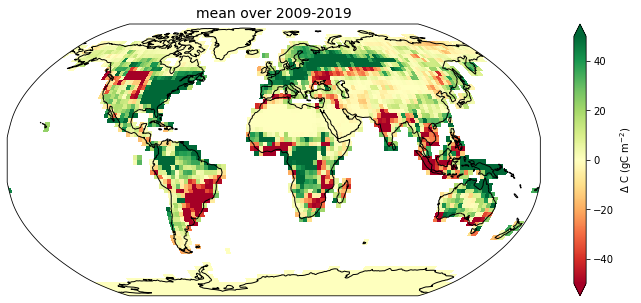

In [187]:
#choose projection: robinson projection
robin = ccrs.Robinson(central_longitude=0) # define target coordinate frame
geo = ccrs.PlateCarree() # define origin coordinate frame

plt.figure(figsize=(12,5))
ax = plt.subplot(1, 1, 1, projection=robin)

#set min/max values for the colorbar
norm = mpl.colors.Normalize(vmin=-50, vmax=50)

q = carbon_flux.where(landfrac1>0).plot(ax=ax, cmap= 'RdYlGn', norm=norm, transform = geo) # plot a colormap in transformed coordinates

#add coastlines
ax.coastlines()

#Add title with the model name (parent_source_id is the model name, from the dataset attributes)
title = 'mean over 2009-2019'
plt.title(title, fontsize=14);

#save figure
plt.savefig("CanESM5 NBP Anomaly at 1.5C Global Map.png")

In [188]:
carbon_flux.sum()

<xarray.DataArray 'Δ C (gC m$^{\\minus2}$)' ()>
array(19516.57510885)

## Plotting nbp of CanESM5 at time of 2.0°C temperature (mean over 10 years)

In [189]:
carbon_flux = (
    ssp_hot1.nbp.sel(time=slice('2021', '2031')).mean(dim='time') -
    ssp_hot1.nbp.sel(time=slice('1850', '1900')).mean(dim='time')
).compute()
carbon_flux.attrs.update(ssp_hot1.attrs)
carbon_flux = carbon_flux.rename (
r'Δ C (gC m$^{\minus2}$)'
)

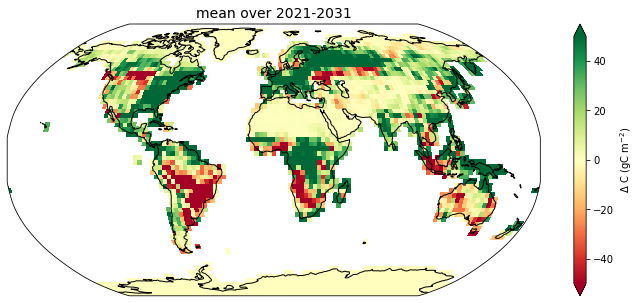

In [190]:
#choose projection: robinson projection
robin = ccrs.Robinson(central_longitude=0) # define target coordinate frame
geo = ccrs.PlateCarree() # define origin coordinate frame

plt.figure(figsize=(12,5))
ax = plt.subplot(1, 1, 1, projection=robin)

#set min/max values for the colorbar
norm = mpl.colors.Normalize(vmin=-50, vmax=50)

q = carbon_flux.where(landfrac1>0).plot(ax=ax, cmap= 'RdYlGn', norm=norm, transform = geo) # plot a colormap in transformed coordinates

#add coastlines
ax.coastlines()

#Add title with the model name (parent_source_id is the model name, from the dataset attributes)
title = 'mean over 2021-2031'
plt.title(title, fontsize=14);

#save figure
plt.savefig("CanESM5 NBP Anomaly at 2.0C Global Map.png")

In [191]:
carbon_flux.sum()

<xarray.DataArray 'Δ C (gC m$^{\\minus2}$)' ()>
array(37880.00807499)

## Plotting nbp of CanESM5 at end-of-century wrt to pre-industrial

In [192]:
nbp_change = (
    ssp_hot1['nbp'].sel(time=slice('2080','2100')).mean(dim='time') -
    ssp_hot1['nbp'].sel(time=slice('1850','1900')).mean(dim='time')
).compute()
nbp_change.attrs.update(ssp_hot1.attrs)
nbp_change = nbp_change.rename(
    r'Δ C (gC m$^{\minus2}$)'
)

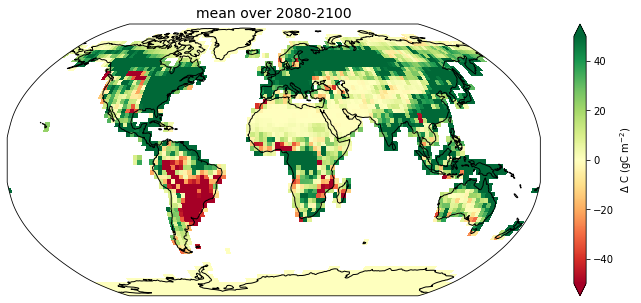

In [193]:
#choose projection: robinson projection
robin = ccrs.Robinson(central_longitude=0) # define target coordinate frame
geo = ccrs.PlateCarree() # define origin coordinate frame

plt.figure(figsize=(12,5))
ax = plt.subplot(1, 1, 1, projection=robin)

#set min/max values for the colorbar
norm = mpl.colors.Normalize(vmin=-50, vmax=50)

q = nbp_change.where(landfrac1>0).plot(ax=ax,cmap= 'RdYlGn', norm=norm, transform = geo) # plot a colormap in transformed coordinates

#add coastlines
ax.coastlines()

#Add title with the model name (parent_source_id is the model name, from the dataset attributes)
title = 'mean over 2080-2100'
plt.title(title, fontsize=14);

#save figure
plt.savefig("CanESM5 NBP Anomaly end-of-century.png")

In [194]:
nbp_change.sum()

<xarray.DataArray 'Δ C (gC m$^{\\minus2}$)' ()>
array(70946.14258532)

# Plotting Maps of hot model: UKESM1-0-LL (ECS 5.36)

In [146]:
# selecting model out of dictionary
ssp_hot2 = nbp_dict[list(nbp_dict.keys())[2]]
ssp_hot2.attrs['parent_source_id']

'UKESM1-0-LL'

In [148]:
# check units
ssp_hot2.nbp.attrs['units']

'g C m-2 y-1'

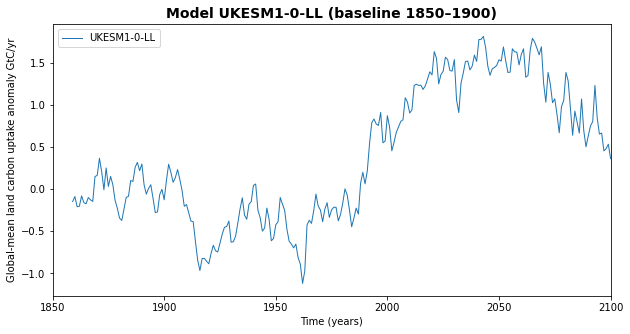

In [149]:
plt.figure(figsize=(10,5))

gnbp3_roll.plot(linewidth=1, label='%s' %(ssp_hot2.attrs['parent_source_id']))

# set titel (chanes in the net biome productivity) and name for axes
plt.title('Model %s (baseline 1850–1900)' %(ssp_hot2.attrs['parent_source_id']), 
         fontsize = 14, fontweight = 'bold')
plt.xlabel('Time (years)')
plt.ylabel(r'Global-mean land carbon uptake anomaly GtC/yr')
plt.xlim([1850,2100])

# plotting legend
plt.legend()
plt.savefig("UKESM1-0-LL Time Series NBP.png")
plt.show();

## Plotting nbp of UKESM1-0-LL at time of 1.5°C temperature (mean over 10 years)

In [150]:
carbon_flux = (
    ssp_hot2.nbp.sel(time=slice('2023', '2033')).mean(dim='time') -
    ssp_hot2.nbp.sel(time=slice('1850', '1900')).mean(dim='time')
).compute()
carbon_flux.attrs.update(ssp_hot2.attrs)
carbon_flux = carbon_flux.rename (
r'Δ C (gC m$^{\minus2}$)'
)

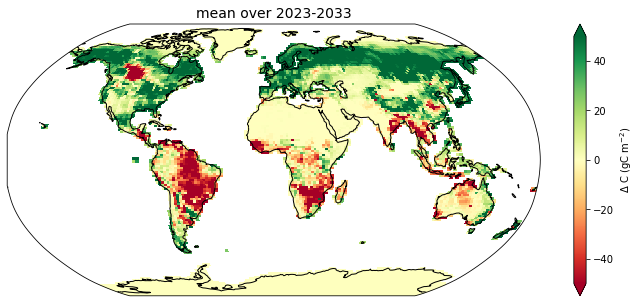

In [151]:
#choose projection: robinson projection
robin = ccrs.Robinson(central_longitude=0) # define target coordinate frame
geo = ccrs.PlateCarree() # define origin coordinate frame

plt.figure(figsize=(12,5))
ax = plt.subplot(1, 1, 1, projection=robin)

#set min/max values for the colorbar
norm = mpl.colors.Normalize(vmin=-50, vmax=50)

q = carbon_flux.where(landfrac3>0).plot(ax=ax, cmap= 'RdYlGn', norm=norm, transform = geo) # plot a colormap in transformed coordinates

#add coastlines
ax.coastlines()

#Add title with the model name (parent_source_id is the model name, from the dataset attributes)
title = 'mean over 2023-2033'
plt.title(title, fontsize=14);

#save figure
plt.savefig("UKESM1-0-LL NBP Anomaly at 1.5C Global Map.png")

In [152]:
carbon_flux.sum()

<xarray.DataArray 'Δ C (gC m$^{\\minus2}$)' ()>
array(103900.59903769)

## Plotting nbp of UKESM1-0-LL at time of 2.0°C temperature (mean over 10 years)

In [153]:
carbon_flux = (
    ssp_hot2.nbp.sel(time=slice('2033', '2043')).mean(dim='time') -
    ssp_hot2.nbp.sel(time=slice('1850', '1900')).mean(dim='time')
).compute()
carbon_flux.attrs.update(ssp_hot2.attrs)
carbon_flux = carbon_flux.rename (
r'Δ C (gC m$^{\minus2}$)'
)

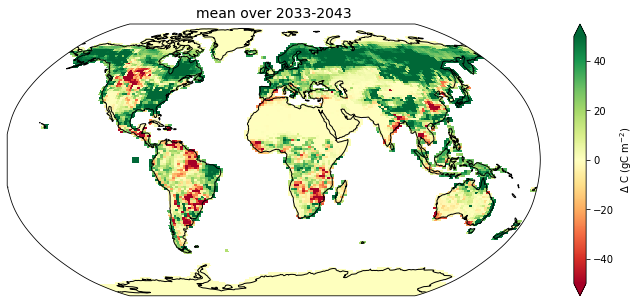

In [154]:
#choose projection: robinson projection
robin = ccrs.Robinson(central_longitude=0) # define target coordinate frame
geo = ccrs.PlateCarree() # define origin coordinate frame

plt.figure(figsize=(12,5))
ax = plt.subplot(1, 1, 1, projection=robin)

#set min/max values for the colorbar
norm = mpl.colors.Normalize(vmin=-50, vmax=50)

q = carbon_flux.where(landfrac3>0).plot(ax=ax, cmap= 'RdYlGn', norm=norm, transform = geo) # plot a colormap in transformed coordinates

#add coastlines
ax.coastlines()

#Add title with the model name (parent_source_id is the model name, from the dataset attributes)
title = 'mean over 2033-2043'
plt.title(title, fontsize=14);

#save figure
plt.savefig("UKESM1-0-LL NBP Anomaly at 2.0C Global Map.png")

In [155]:
carbon_flux.sum()

<xarray.DataArray 'Δ C (gC m$^{\\minus2}$)' ()>
array(136865.20664701)

## Plotting nbp of UKESM1-0-LL at end-of-century wrt to pre-industrial

In [156]:
nbp_change = (
    ssp_hot2['nbp'].sel(time=slice('2080','2100')).mean(dim='time') -
    ssp_hot2['nbp'].sel(time=slice('1850','1900')).mean(dim='time')
).compute()
nbp_change.attrs.update(ssp_hot2.attrs)
nbp_change = nbp_change.rename(
    r'Δ C (gC m$^{\minus2}$)'
)

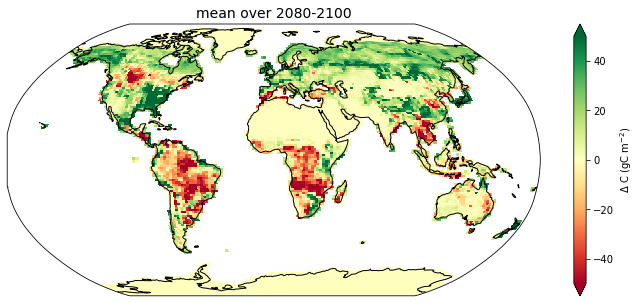

In [157]:
#choose projection: robinson projection
robin = ccrs.Robinson(central_longitude=0) # define target coordinate frame
geo = ccrs.PlateCarree() # define origin coordinate frame

plt.figure(figsize=(12,5))
ax = plt.subplot(1, 1, 1, projection=robin)

#set min/max values for the colorbar
norm = mpl.colors.Normalize(vmin=-50, vmax=50)

q = nbp_change.where(landfrac3>0).plot(ax=ax,cmap= 'RdYlGn', norm=norm, transform = geo) # plot a colormap in transformed coordinates

#add coastlines
ax.coastlines()

#Add title with the model name (parent_source_id is the model name, from the dataset attributes)
title = 'mean over 2080-2100'
plt.title(title, fontsize=14);

#save figure
plt.savefig("UKESM1-0-LL nbp end of century global map.png")

In [158]:
nbp_change.sum()

<xarray.DataArray 'Δ C (gC m$^{\\minus2}$)' ()>
array(55337.02762714)

# Plotting Maps of cold model: MIROC-ES2L (ECS 2.66)

In [62]:
# selecting model out of dictionary
ssp_cold1 = nbp_dict[list(nbp_dict.keys())[7]]
ssp_cold1.attrs['parent_source_id']

'MIROC-ES2L'

In [161]:
# check units
ssp_cold1.nbp.attrs['units']

'g C m-2 y-1'

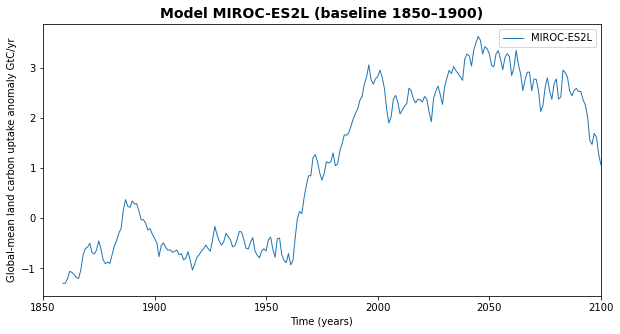

In [162]:
plt.figure(figsize=(10,5))

gnbp8_roll.plot(linewidth=1, label='%s' %(ssp_cold1.attrs['parent_source_id']))

# set titel (chanes in the net biome productivity) and name for axes
plt.title('Model %s (baseline 1850–1900)' %(ssp_cold1.attrs['parent_source_id']), 
         fontsize = 14, fontweight = 'bold')
plt.xlabel('Time (years)')
plt.ylabel(r'Global-mean land carbon uptake anomaly GtC/yr')
plt.xlim([1850,2100])

# plotting legend
plt.legend()
plt.savefig("MIROC-ES2L Time Series NBP.png")
plt.show();

## Plotting nbp of MIROC-ES2L at time of 1.5°C temperature (mean over 10 years)

In [163]:
carbon_flux = (
    ssp_cold1.nbp.sel(time=slice('2037', '2047')).mean(dim='time') -
    ssp_cold1.nbp.sel(time=slice('1850', '1900')).mean(dim='time')
).compute()
carbon_flux.attrs.update(ssp_cold1.attrs)
carbon_flux = carbon_flux.rename (
r'Δ C (gC m$^{\minus2}$)'
)

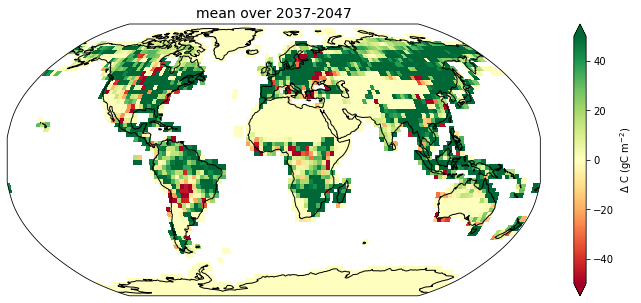

In [164]:
#choose projection: robinson projection
robin = ccrs.Robinson(central_longitude=0) # define target coordinate frame
geo = ccrs.PlateCarree() # define origin coordinate frame

plt.figure(figsize=(12,5))
ax = plt.subplot(1, 1, 1, projection=robin)

#set min/max values for the colorbar
norm = mpl.colors.Normalize(vmin=-50, vmax=50)

q = carbon_flux.where(landfrac8>0).plot(ax=ax, cmap= 'RdYlGn', norm=norm, transform = geo) # plot a colormap in transformed coordinates

#add coastlines
ax.coastlines()

#Add title with the model name (parent_source_id is the model name, from the dataset attributes)
title = 'mean over 2037-2047'
plt.title(title, fontsize=14);

#save figure
plt.savefig("MIROC-ES2L NBP Anomaly at 1.5C Global Map.png")

In [165]:
carbon_flux.sum()

<xarray.DataArray 'Δ C (gC m$^{\\minus2}$)' ()>
array(71185.70899632)

## Plotting nbp of MIROC-ES2L at time of 2.0°C temperature (mean over 10 years)

In [51]:
carbon_flux = (
    ssp_cold1.nbp.sel(time=slice('2066', '2076')).mean(dim='time') -
    ssp_cold1.nbp.sel(time=slice('1850', '1900')).mean(dim='time')
).compute()
carbon_flux.attrs.update(ssp_cold1.attrs)
carbon_flux = carbon_flux.rename (
r'Δ C (gC m$^{\minus2}$)'
)

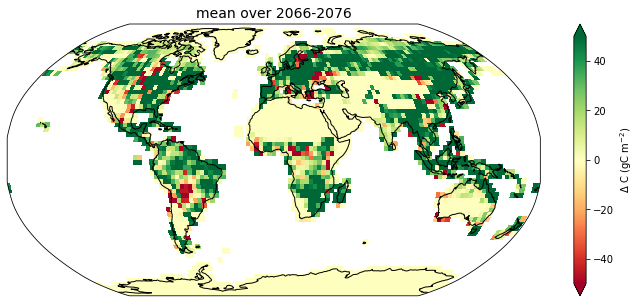

In [166]:
#choose projection: robinson projection
robin = ccrs.Robinson(central_longitude=0) # define target coordinate frame
geo = ccrs.PlateCarree() # define origin coordinate frame

plt.figure(figsize=(12,5))
ax = plt.subplot(1, 1, 1, projection=robin)

#set min/max values for the colorbar
norm = mpl.colors.Normalize(vmin=-50, vmax=50)

q = carbon_flux.where(landfrac8>0).plot(ax=ax, cmap= 'RdYlGn', norm=norm, transform = geo) # plot a colormap in transformed coordinates

#add coastlines
ax.coastlines()

#Add title with the model name (parent_source_id is the model name, from the dataset attributes)
title = 'mean over 2066-2076'
plt.title(title, fontsize=14);

#save figure
plt.savefig("MIROC-ES2L NBP Anomaly at 2.0C Global Map.png")

In [167]:
carbon_flux.sum()

<xarray.DataArray 'Δ C (gC m$^{\\minus2}$)' ()>
array(71185.70899632)

## Plotting nbp of MIROC-ES2L at end-of-century wrt to pre-industrial

In [168]:
nbp_change = (
    ssp_cold1['nbp'].sel(time=slice('2080','2100')).mean(dim='time') -
    ssp_cold1['nbp'].sel(time=slice('1850','1900')).mean(dim='time')
).compute()
nbp_change.attrs.update(ssp_cold1.attrs)
nbp_change = nbp_change.rename(
    r'Δ C (gC m$^{\minus2}$)'
)

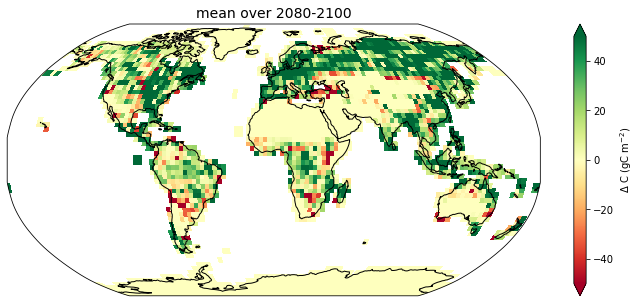

In [169]:
#choose projection: robinson projection
robin = ccrs.Robinson(central_longitude=0) # define target coordinate frame
geo = ccrs.PlateCarree() # define origin coordinate frame

plt.figure(figsize=(12,5))
ax = plt.subplot(1, 1, 1, projection=robin)

#set min/max values for the colorbar
norm = mpl.colors.Normalize(vmin=-50, vmax=50)

q = nbp_change.where(landfrac8>0).plot(ax=ax,cmap= 'RdYlGn', norm=norm, transform = geo) # plot a colormap in transformed coordinates

#add coastlines
ax.coastlines()

#Add title with the model name (parent_source_id is the model name, from the dataset attributes)
title = 'mean over 2080-2100'
plt.title(title, fontsize=14);

#save figure
plt.savefig("MIROC-ES2L nbp end of century global map.png")

In [170]:
nbp_change.sum()

<xarray.DataArray 'Δ C (gC m$^{\\minus2}$)' ()>
array(50941.7091205)

# Plotting Maps of cold model: INM-CM4-8 (ECS 1.83)

In [171]:
# selecting model out of dictionary
ssp_cold2 = nbp_dict[list(nbp_dict.keys())[9]]
ssp_cold2.attrs['parent_source_id']

'INM-CM4-8'

In [173]:
# check units
ssp_cold2.nbp.attrs['units']

'g C m-2 y-1'

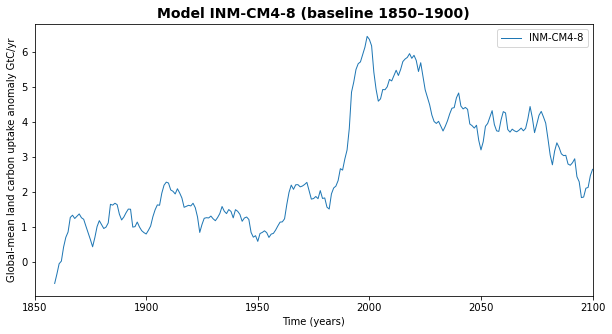

In [174]:
plt.figure(figsize=(10,5))

gnbp10_roll.plot(linewidth=1, label='%s' %(ssp_cold2.attrs['parent_source_id']))

# set titel (chanes in the net biome productivity) and name for axes
plt.title('Model %s (baseline 1850–1900)' %(ssp_cold2.attrs['parent_source_id']), 
         fontsize = 14, fontweight = 'bold')
plt.xlabel('Time (years)')
plt.ylabel(r'Global-mean land carbon uptake anomaly GtC/yr')
plt.xlim([1850,2100])

# plotting legend
plt.legend()
plt.savefig("INM-CM4-8 Time Series NBP.png")
plt.show();

## Plotting nbp of INM-CM4-LM at time of 1.5°C temperature (mean over 10 years)

In [175]:
carbon_flux = (
    ssp_cold2.nbp.sel(time=slice('2037', '2047')).mean(dim='time') -
    ssp_cold2.nbp.sel(time=slice('1850', '1900')).mean(dim='time')
).compute()
carbon_flux.attrs.update(ssp_cold2.attrs)
carbon_flux = carbon_flux.rename (
r'Δ C (gC m$^{\minus2}$)'
)

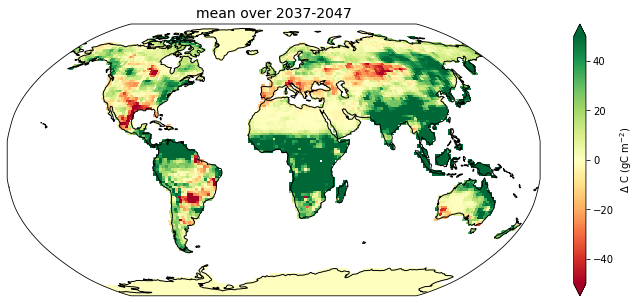

In [176]:
#choose projection: robinson projection
robin = ccrs.Robinson(central_longitude=0) # define target coordinate frame
geo = ccrs.PlateCarree() # define origin coordinate frame

plt.figure(figsize=(12,5))
ax = plt.subplot(1, 1, 1, projection=robin)

#set min/max values for the colorbar
norm = mpl.colors.Normalize(vmin=-50, vmax=50)

q = carbon_flux.where(landfrac10>0).plot(ax=ax, cmap= 'RdYlGn', norm=norm, transform = geo) # plot a colormap in transformed coordinates

#add coastlines
ax.coastlines()

#Add title with the model name (parent_source_id is the model name, from the dataset attributes)
title = 'mean over 2037-2047'
plt.title(title, fontsize=14);

#save figure
plt.savefig("INM-CM4-LM NBP Anomaly at 1.5C Global Map.png")

In [177]:
carbon_flux.sum()

<xarray.DataArray 'Δ C (gC m$^{\\minus2}$)' ()>
array(101309.65566827)

## Plotting nbp of INM-CM4-8 at time of 2.0°C temperature (mean over 10 years)

In [178]:
carbon_flux = (
    ssp_cold2.nbp.sel(time=slice('2059', '2069')).mean(dim='time') -
    ssp_cold2.nbp.sel(time=slice('1850', '1900')).mean(dim='time')
).compute()
carbon_flux.attrs.update(ssp_cold2.attrs)
carbon_flux = carbon_flux.rename (
r'Δ C (gC m$^{\minus2}$)'
)

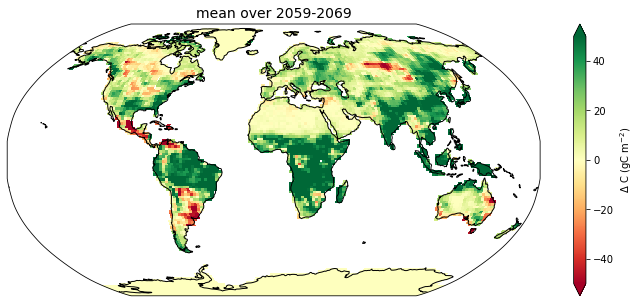

In [180]:
#choose projection: robinson projection
robin = ccrs.Robinson(central_longitude=0) # define target coordinate frame
geo = ccrs.PlateCarree() # define origin coordinate frame

plt.figure(figsize=(12,5))
ax = plt.subplot(1, 1, 1, projection=robin)

#set min/max values for the colorbar
norm = mpl.colors.Normalize(vmin=-50, vmax=50)

q = carbon_flux.where(landfrac10>0).plot(ax=ax, cmap= 'RdYlGn', norm=norm, transform = geo) # plot a colormap in transformed coordinates

#add coastlines
ax.coastlines()

#Add title with the model name (parent_source_id is the model name, from the dataset attributes)
title = 'mean over 2059-2069'
plt.title(title, fontsize=14);

#save figure
plt.savefig("INM-CM4-8 NBP Anomaly at 2.0C Global Map.png")

In [181]:
carbon_flux.sum()

<xarray.DataArray 'Δ C (gC m$^{\\minus2}$)' ()>
array(102891.64157397)

## Plotting nbp of INM-CM4-8 at end-of-century wrt to pre-industrial

In [183]:
nbp_change = (
    ssp_cold2['nbp'].sel(time=slice('2080','2100')).mean(dim='time') -
    ssp_cold2['nbp'].sel(time=slice('1850','1900')).mean(dim='time')
).compute()
nbp_change.attrs.update(ssp_cold2.attrs)
nbp_change = nbp_change.rename(
    r'Δ C (gC m$^{\minus2}$)'
)

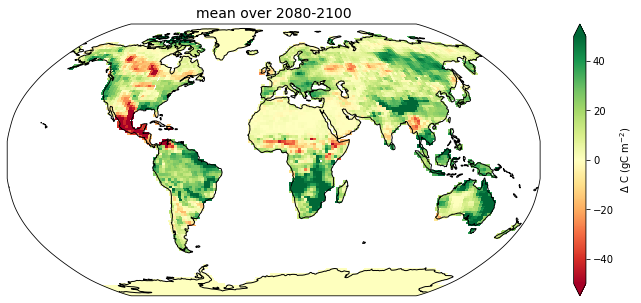

In [184]:
#choose projection: robinson projection
robin = ccrs.Robinson(central_longitude=0) # define target coordinate frame
geo = ccrs.PlateCarree() # define origin coordinate frame

plt.figure(figsize=(12,5))
ax = plt.subplot(1, 1, 1, projection=robin)

#set min/max values for the colorbar
norm = mpl.colors.Normalize(vmin=-50, vmax=50)

q = nbp_change.where(landfrac10>0).plot(ax=ax,cmap= 'RdYlGn', norm=norm, transform = geo) # plot a colormap in transformed coordinates

#add coastlines
ax.coastlines()

#Add title with the model name (parent_source_id is the model name, from the dataset attributes)
title = 'mean over 2080-2100'
plt.title(title, fontsize=14);

#save figure
plt.savefig("INM-CM4-8 nbp end of century global map.png")

In [185]:
nbp_change.sum()

<xarray.DataArray 'Δ C (gC m$^{\\minus2}$)' ()>
array(64957.32085736)